<a href="https://colab.research.google.com/github/AyushBhatt99/Short-term-Load-Forecasting/blob/main/xgboostfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('load.csv')

In [3]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

In [4]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']])
# df

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
# Split data into training and testing sets
train_size = int(len(df) * 0.75)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

In [7]:
from xgboost import XGBRegressor

In [8]:
Regressor=XGBRegressor(n_estimators =200,random_state = 0)
Regressor.fit(train_X,train_y)
y_pred=Regressor.predict(test_X)


In [9]:
# Calculate the absolute errors
errors = abs(y_pred - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
print('mape mean:', np.mean(mape), '%.')
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: nan
mape mean: nan %.
Accuracy: nan %.


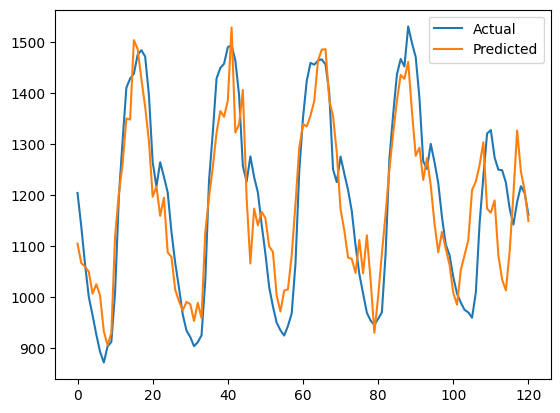

In [10]:
plt.plot(test_y[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.legend()
plt.show()

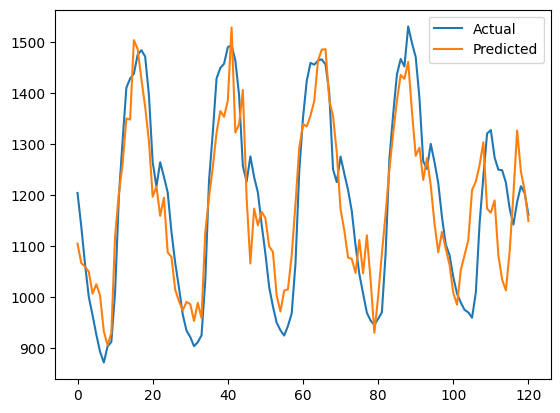

In [11]:
plt.plot(test_y[0:121], label='Actual')
plt.plot(y_pred[0:121], label='Predicted')
plt.legend()
plt.show()

In [12]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    datetime_str = first_forecast['dt_txt']
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity']
    precipitation = 0.0597976  # Assuming precipitation data is not available in the response
    wind = first_forecast['weather'][0]['description']
    wind_speed = first_forecast['wind']['speed']

    # Determine if it's a holiday (Sunday or Monday)
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0

    # Print the extracted information
    print(f'Date Time: {datetime_str}')
    print(f'Temperature: {temperature}')
    print(f'Humidity: {humidity}')
    print(f'Precipitation: {precipitation}')  # Assuming precipitation data is not available

    print(f'Wind Speed: {wind_speed} ')
    print(f'Holiday: {holiday}')  # Print holiday value
else:
    print('Weather data fetch failed.')


Date Time: 2024-04-23 12:00:00
Temperature: 40.22
Humidity: 17
Precipitation: 0.0597976
Wind Speed: 5.5 
Holiday: 0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import requests
from datetime import datetime
from xgboost import XGBRegressor

# Load the trained XGBoost model
# Regressor = Regressor2
# Regressor.load_model('/path/to/xgboost_model.pkl')

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city
# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity'] / 1000  # Scale humidity to 0-1
    precipitation = 0.017  # Assuming precipitation data is not available in the response
    wind_speed = first_forecast['wind']['speed'] * 3.6  # Convert wind speed to km/h
    # Assuming no holiday information is available from the weather API
    datetime_obj = datetime.strptime(first_forecast['dt_txt'], '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0

    # Create a DataFrame similar to your historical data
    data = {
        'temp_2M': temperature,
        'humidity_2M': humidity,
        'precipitation_2M': precipitation,
        'wind_speed_2M': wind_speed,
        'holiday': holiday
    }
    input_df = pd.DataFrame(data, index=[0])

    # Load your data
    df = pd.read_csv('load.csv')  # Replace 'load.csv' with the actual file name if needed

    # Fit MinMaxScaler with your data
    scaler = MinMaxScaler()
    scaler.fit(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']])

    # Scale input data using the fitted scaler
    input_df_scaled = scaler.transform(input_df)

    # Use your trained XGBoost model to predict net demand
    net_demand_prediction = Regressor.predict(input_df_scaled)

    # Display the predicted net demand value
    print("Predicted Net Demand:", net_demand_prediction)
else:
    print('Weather data fetch failed.')


Predicted Net Demand: [1482.548]
